In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy import signal
from IPython import display
from sklearn.metrics import mean_squared_error

#Signal constants
A = 100
T = 0.02

#Plotting constants
FRANGE = 500
TRANGE = 0.02
R = 10000

<h3>Function Declarations</h3>
<p>Functions were created to represent the signal, fourier coeffecients, the fourier series, and to plot them in the frequency and time domains.

In [2]:
#Input function
def x(t):
    return signal.sawtooth(2*cmath.pi*(1/T)*(t-0.25))

#Fourier coeffecients function
def ak(k):
    if k == 0:
        return 0
    else:
        return ((-1)**k)*(-A*T)/(2j*cmath.pi*k)
        
#Fourier series function
def xm(t):
    sum = 0
    for i in range(2*m + 1):
        k = i - m
        sum += ak(k)*cmath.exp((2j*cmath.pi*k*t)/T)
    return sum

#***************************************************

#makes frequency domain array from function
def f_array(f):
    x = np.array([])
    y = np.array([])
    for i in range(int(2*FRANGE/(1/T) + 1)):
        k = i - FRANGE/(1/T)
        x = np.append(x, k*(1/T))
        y = np.append(y, ak(k))
    return x, y

#makes time domain array from function
def to_array(f):
    x = np.array([])
    y = np.array([])
    for i in range(int(TRANGE*R*2 + 1)):
        t = i/R - TRANGE
        y = np.append(y, (f(t)))
        x = np.append(x, t)
    return x, y

<h3>Frequency Domain Plots</h3>
<p>Magnitude and phase of the fourier series coeffecients were plotted as functions of frequency Hz</p>

<StemContainer object of 3 artists>

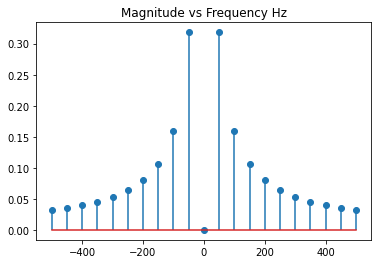

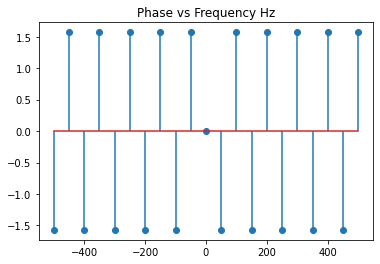

In [3]:
#Plots magnitude and phase spectra of fourier series
fr, aks = f_array(ak)
mag_ak = abs(aks)
phase_ak = [cmath.phase(i) for i in aks]

plt.figure()
plt.title("Magnitude vs Frequency Hz")
plt.stem(fr, mag_ak)

plt.figure()
plt.title("Phase vs Frequency Hz")
plt.stem(fr, phase_ak)


<h3>Mean Squared Error for M = 5, 10, 100</h3>
<p>The fourier series is plotted distinctly for M = 5, 10, 100 and mean square error is calculated</p>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


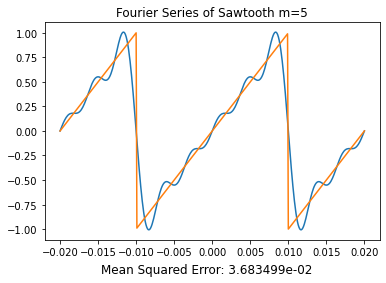

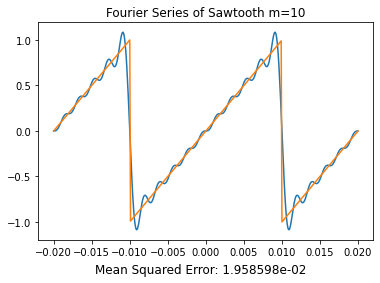

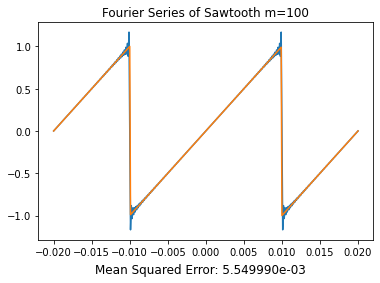

In [4]:
#Plots fourier series for m=5,10,100 & signal
assumeM = [5, 10, 100]
for i in assumeM:
    plt.figure()
    m = i
    t, y = to_array(xm)
    plt.plot(t, y)
    t, y2 = to_array(x)
    plt.plot(t, y2)
    plt.title("Fourier Series of Sawtooth m={}".format(m))

    msq = mean_squared_error(y.real, y2)
    txt = "Mean Squared Error: {:e}".format(msq)
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

<p>Increasing the value of M reduces mean square error. The releationship is an exponential decay of mean square error as M increases.</p>

<h3>Fourier Series Error as a Function of M</h3>
<p>An animation demonstrates the convergence of the fourier series to the sawtooth signal, and the mean squared error function is plotted</p>

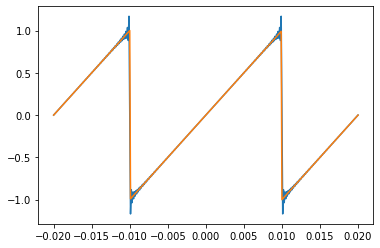

<Figure size 432x288 with 0 Axes>

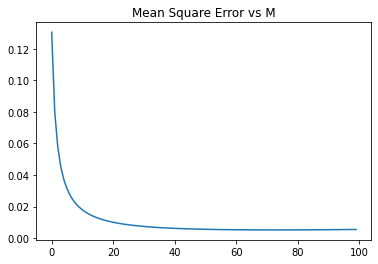

In [5]:
#Plots fourier series animation for 0<m<100 & signal 
err = []
plt.figure()
for i in range(100):
    m = i+1
    t, y = to_array(xm)
    plt.plot(t, y)
    t, y2 = to_array(x)
    plt.plot(t, y2)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()

    err.append(mean_squared_error(y.real, y2))

#Plotting mean square error as a function of M
plt.figure()
plt.title("Mean Square Error vs M")
plt.plot(err)